In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

import warnings 
warnings.filterwarnings('ignore')



Use Pandas to import the data from "fcc-forum-pageviews.csv". Set the index to the date column.

Clean the data by filtering out days when the page views were in the top 2.5% of the dataset or bottom 2.5% of the dataset.

Create a draw_line_plot function that uses Matplotlib to draw a line chart similar to "examples/Figure_1.png". The title should be Daily freeCodeCamp Forum Page Views 5/2016-12/2019. The label on the x axis should be Date and the label on the y axis should be Page Views.

Create a draw_bar_plot function that draws a bar chart similar to "examples/Figure_2.png". It should show average daily page views for each month grouped by year. The legend should show month labels and have a title of Months. On the chart, the label on the x axis should be Years and the label on the y axis should be Average Page Views.

Create a draw_box_plot function that uses Seaborn to draw two adjacent box plots similar to "examples/Figure_3.png". These box plots should show how the values are distributed within a given year or month and how it compares over time. The title of the first chart should be Year-wise Box Plot (Trend) and the title of the second chart should be Month-wise Box Plot (Seasonality). Make sure the month labels on bottom start at Jan and the x and y axis are labeled correctly. The boilerplate includes commands to prepare the data.

### Use Pandas to import the data from "fcc-forum-pageviews.csv". Set the index to the date column.

In [33]:
df = pd.read_csv('fcc-forum-pageviews.csv', index_col ='date',parse_dates = True )
df

,value
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933
...,...
2019-11-29,171584
2019-11-30,141161
2019-12-01,142918


### Clean the data by filtering out days when the page views were in the top 2.5% of the dataset or bottom 2.5% of the dataset.
 

In [34]:
top_percent = df['value'].quantile(0.025)
bottom_percent = df['value'].quantile(0.975)
print(top_percent)
print(bottom_percent)

17876.4
177613.075


In [35]:
above_percent = df[df.value < top_percent].index
below_percent = df[df.value > bottom_percent].index
# drop the dates that are above and below
above_percent
below_percent

DatetimeIndex(['2018-10-14', '2018-10-16', '2019-06-17', '2019-06-18',
               '2019-07-10', '2019-08-06', '2019-08-07', '2019-10-16',
               '2019-10-21', '2019-10-22', '2019-10-23', '2019-10-24',
               '2019-10-28', '2019-10-29', '2019-10-30', '2019-10-31',
               '2019-11-04', '2019-11-05', '2019-11-06', '2019-11-07',
               '2019-11-11', '2019-11-12', '2019-11-13', '2019-11-14',
               '2019-11-15', '2019-11-18', '2019-11-19', '2019-11-22',
               '2019-11-25', '2019-11-26', '2019-11-27', '2019-11-28',
               '2019-12-02'],
              dtype='datetime64[ns]', name='date', freq=None)

In [36]:
df.drop(index = ['2016-05-09', '2016-05-10', '2016-05-11', '2016-05-12', '2016-05-13',
       '2016-05-14', '2016-05-15', '2016-05-16', '2016-05-17', '2016-05-18',
       '2016-05-20', '2016-05-21', '2016-05-22', '2016-05-23', '2016-05-24',
       '2016-05-25', '2016-05-30', '2016-05-31', '2016-06-01', '2016-06-02',
       '2016-06-03', '2016-06-04', '2016-06-05', '2016-06-06', '2016-06-10',
       '2016-06-11', '2016-06-12', '2016-06-13', '2016-06-16', '2016-07-19',
       '2016-07-30', '2016-07-31', '2018-10-02','2018-10-14', '2018-10-16', '2019-06-17', '2019-06-18', '2019-07-10',
       '2019-08-06', '2019-08-07', '2019-10-16', '2019-10-21', '2019-10-22',
       '2019-10-23', '2019-10-24', '2019-10-28', '2019-10-29', '2019-10-30',
       '2019-10-31', '2019-11-04', '2019-11-05', '2019-11-06', '2019-11-07',
       '2019-11-11', '2019-11-12', '2019-11-13', '2019-11-14', '2019-11-15',
       '2019-11-18', '2019-11-19', '2019-11-22', '2019-11-25', '2019-11-26',
       '2019-11-27', '2019-11-28', '2019-12-02'],inplace = True)

In [37]:
df.sort_values

<bound method DataFrame.sort_values of              value
date              
2016-05-19   19736
2016-05-26   18060
2016-05-27   19997
2016-05-28   19044
2016-05-29   20325
...            ...
2019-11-24  138875
2019-11-29  171584
2019-11-30  141161
2019-12-01  142918
2019-12-03  158549

[1238 rows x 1 columns]>

### Create a draw_line_plot function that uses Matplotlib to draw a line chart similar to "examples/Figure_1.png". The title should be Daily freeCodeCamp Forum Page Views 5/2016-12/2019. The label on the x axis should be Date and the label on the y axis should be Page Views.

Text(0, 0.5, 'Page Views')

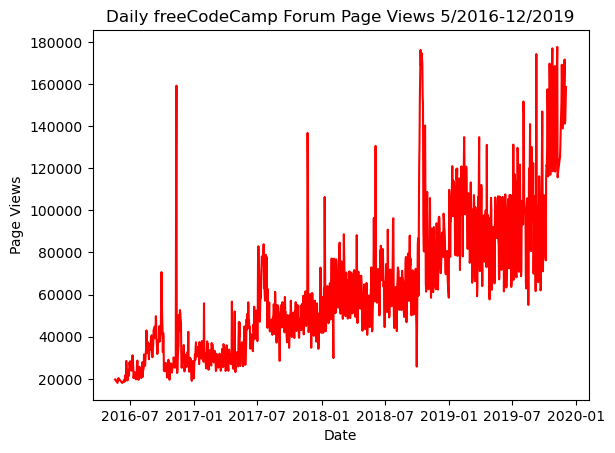

In [40]:
plt.plot(df.index, df['value'],color = 'red')
plt.title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')
plt.xlabel('Date')
plt.ylabel('Page Views')

### Create a draw_bar_plot function that draws a bar chart similar to "examples/Figure_2.png". It should show average daily page views for each month grouped by year. The legend should show month labels and have a title of Months. On the chart, the label on the x axis should be Years and the label on the y axis should be Average Page Views.

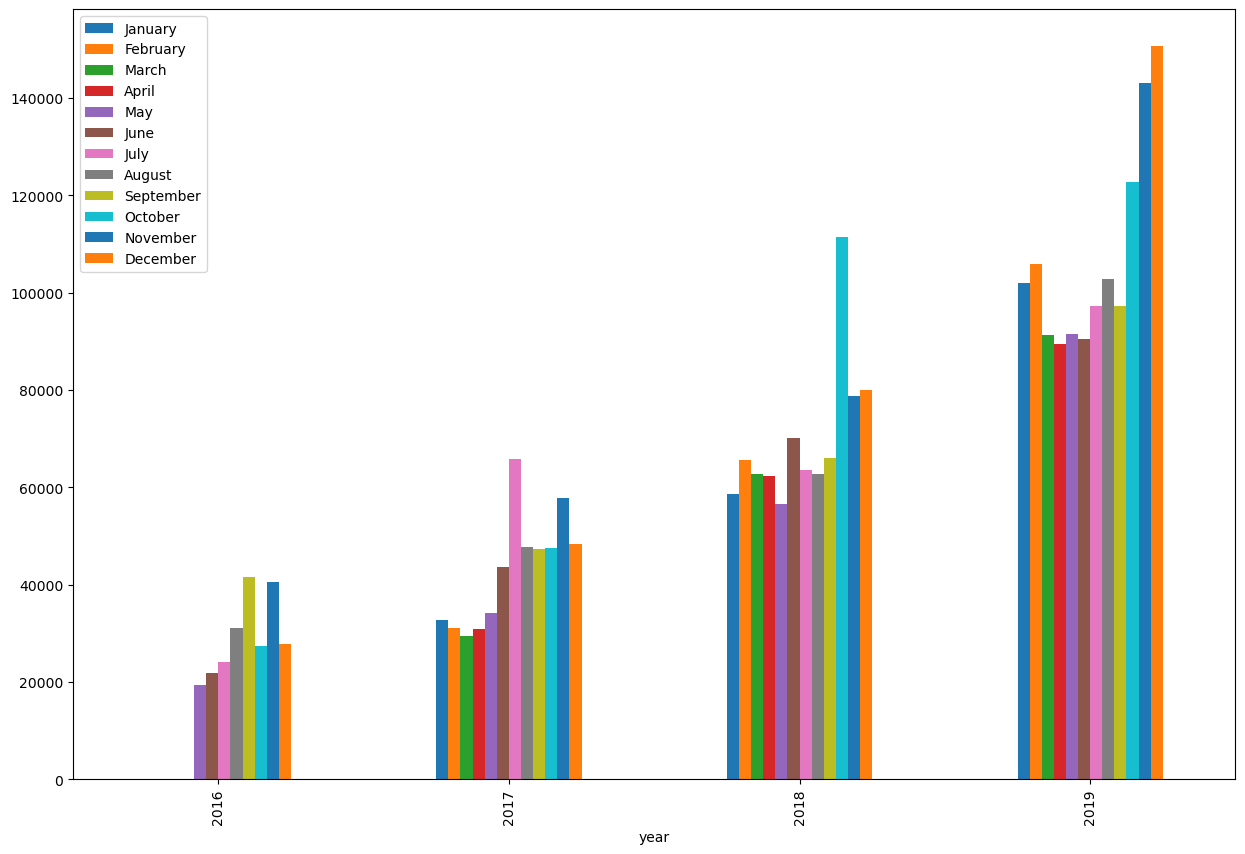

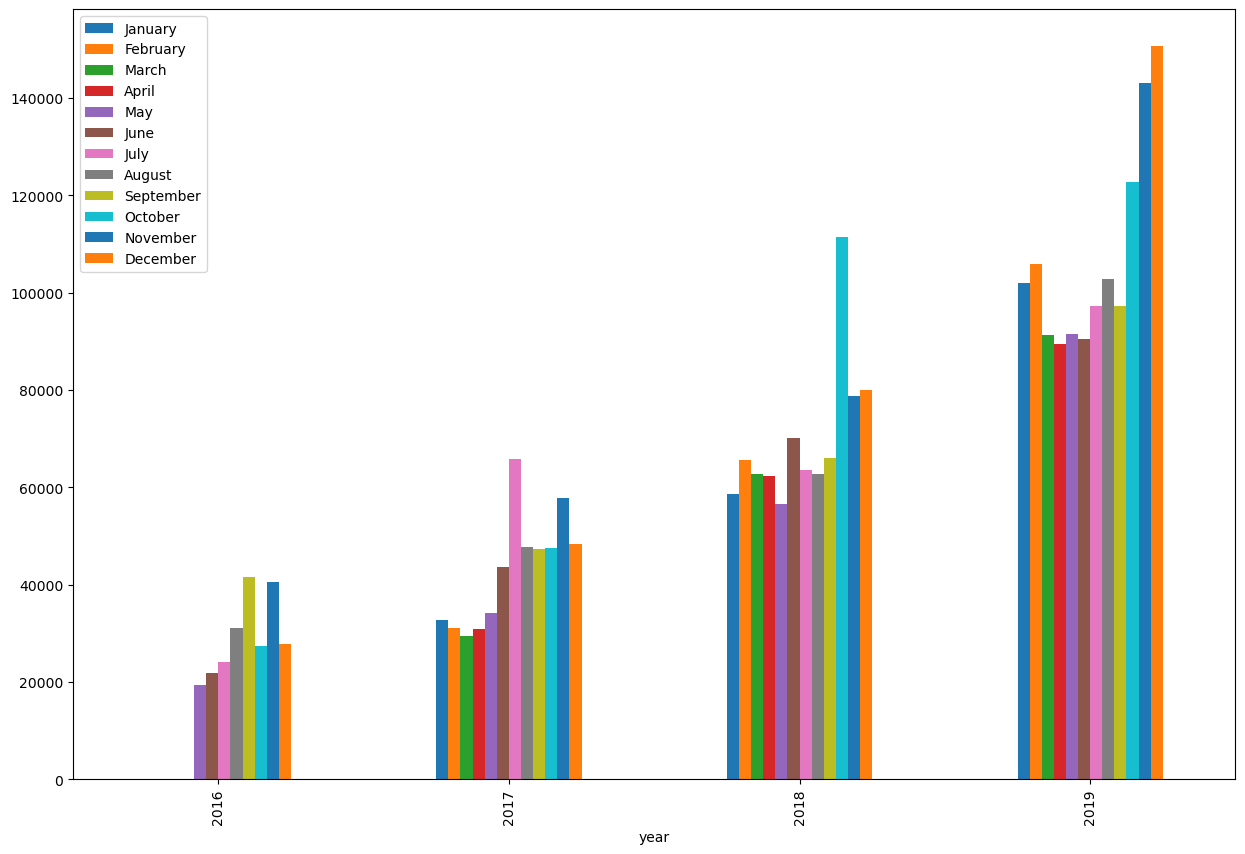

In [45]:
def draw_bar_plot():
    df_bar = df.copy()
    df_bar['year'] = df_bar.index.year # extract year
    df_bar['month'] = df_bar.index.month # extract month
    
    df_bar = df_bar.groupby(['year','month'])['value'].mean() #group by month and year
    df_bar = df_bar.unstack()
    df_bar.columns = ('January','February','March','April','May','June','July','August','September','October','November','December')
    fig = df_bar.plot(kind = 'bar',figsize = (15,10),legend = 'Months').figure
    plt.xlabel = ('Years')
    plt.ylabel = ('Average Page Views')
    return fig
draw_bar_plot()

### Create a draw_box_plot function that uses Seaborn to draw two adjacent box plots similar to "examples/Figure_3.png". These box plots should show how the values are distributed within a given year or month and how it compares over time. The title of the first chart should be Year-wise Box Plot (Trend) and the title of the second chart should be Month-wise Box Plot (Seasonality). Make sure the month labels on bottom start at Jan and the x and y axis are labeled correctly. The boilerplate includes commands to prepare the data.

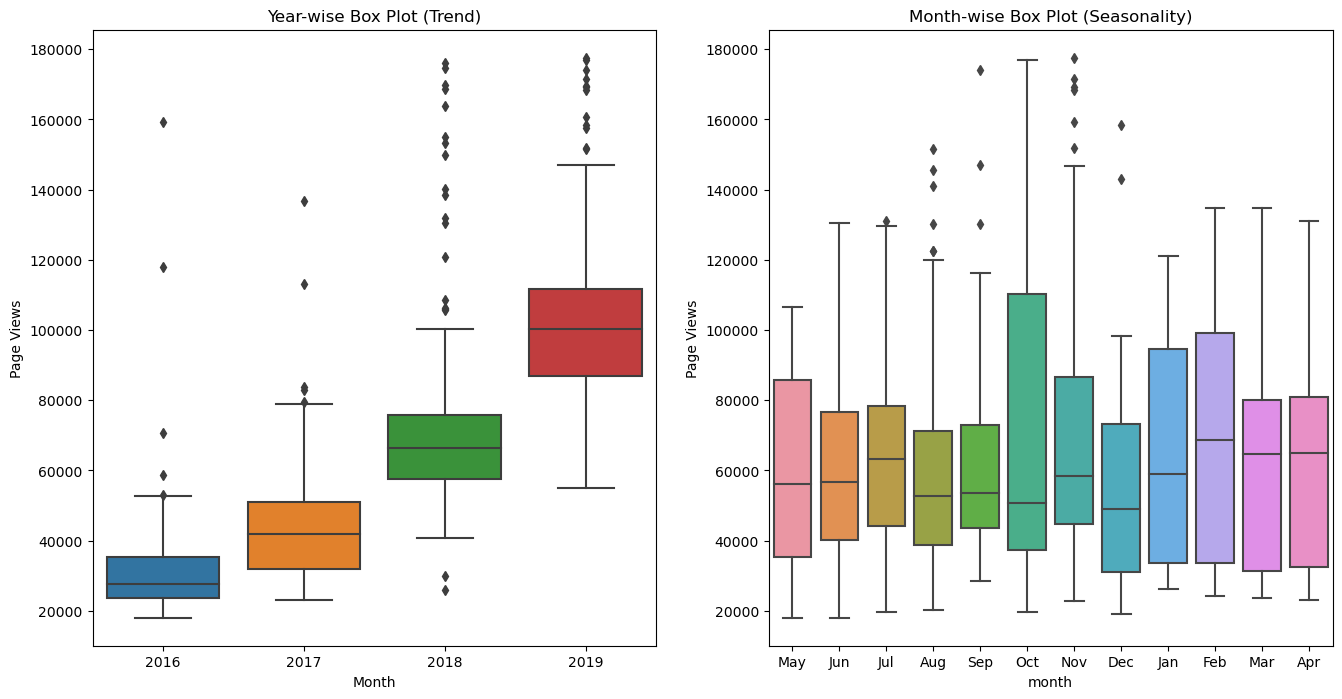

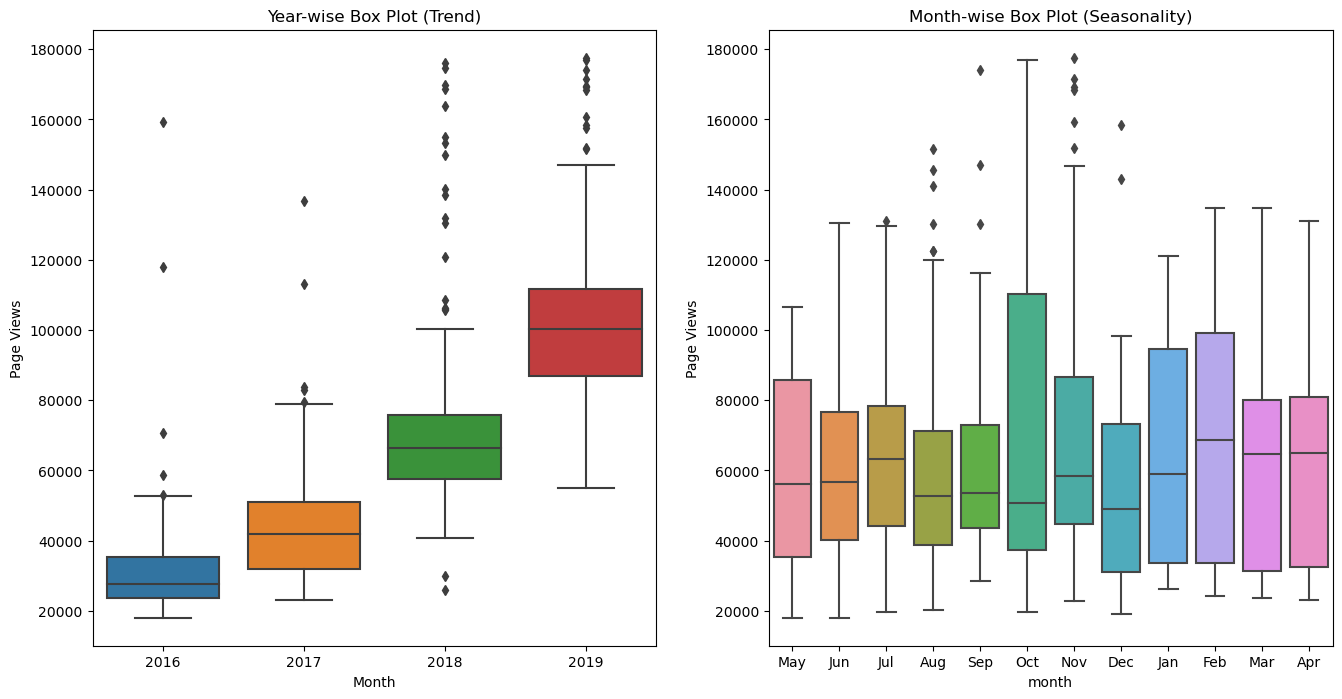

In [46]:
def draw_box_plot():
    # extract info
    df_box = df.copy() # create copy
    df_box.reset_index(inplace = True)
    df_box['year'] = [d.year for d in df_box.date] # extract years using list comp
    df_box['month'] = [d.strftime('%b') for d in df_box.date] # extract using list comp
    # plot
    fig, (ax1,ax2)=plt.subplots(1,2,figsize = (16,8))
    sns.boxplot(data = df_box, ax = ax1, x = 'year', y = 'value')
    ax1.set_title('Year-wise Box Plot (Trend)')
    ax1.set_xlabel('Year')
    ax1.set_ylabel('Page Views')

    sns.boxplot(data = df_box, ax = ax2, x = 'month', y = 'value')
    ax2.set_title('Month-wise Box Plot (Seasonality)')
    ax1.set_xlabel('Month')
    ax2.set_ylabel('Page Views')
    return fig
    
draw_box_plot()